## Instalacion de paqutes

In [ ]:
!pip install recbole
!pip install ray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 7.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58.9 MB 4.3 MB/s 
     |████████████████████████████████| 8.8 MB 18.6 MB/s 
     |████████████████████████████████| 468 kB 41.9 MB/s 


In [ ]:
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Descarga de Datasets

In [ ]:
import gdown
import pandas as pd
import numpy as np

In [ ]:
# Descarga movie lens 1m 
url_ml_1m = 'https://drive.google.com/uc?export=download&id=1sqgFpwHNWNPaMlVFHbQQXIRaAN9i3KUJ'

gdown.download(url_ml_1m, 'ml-1m.zip', quiet=False)


Downloading...
From: https://drive.google.com/uc?export=download&id=1sqgFpwHNWNPaMlVFHbQQXIRaAN9i3KUJ
To: /content/ml-1m.zip
100%|██████████| 5.86M/5.86M [00:00<00:00, 62.8MB/s]


'ml-1m.zip'

In [ ]:
# Extract dataset
!7z e ml-1m.zip -o./data
!rm ml-1m.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 5857569 bytes (5721 KiB)

Extracting archive: ml-1m.zip
--
Path = ml-1m.zip
Type = zip
Physical Size = 5857569

  0%     92% - ml-1m.inter                  Everything is Ok

Files: 4
Size:       21861648
Compressed: 5857569


In [ ]:
!ls ./data

ml-1m.inter  ml-1m.item  ml-1m.user  README.md


## Preprocesamiento de Datasets

In [ ]:
user_movieLens = pd.read_csv('data/ml-1m.user', sep='\t',  index_col = 0)
inter_movieLens = pd.read_csv('data/ml-1m.inter', sep='\t',  index_col = 0)
item_movieLens = pd.read_csv('data/ml-1m.item', sep='\t',  index_col = 0)

In [ ]:
item_movieLens

,movie_title:token_seq,release_year:token,genre:token_seq
item_id:token,,,
1,Toy Story,1995,Animation Children's Comedy
2,Jumanji,1995,Adventure Children's Fantasy
3,Grumpier Old Men,1995,Comedy Romance
4,Waiting to Exhale,1995,Comedy Drama
5,Father of the Bride Part II,1995,Comedy
...,...,...,...
3948,Meet the Parents,2000,Comedy
3949,Requiem for a Dream,2000,Drama
3950,Tigerland,2000,Drama


In [ ]:
user_movieLens.describe()

,age:token,occupation:token
count,6040.000000,6040.000000
mean,30.639238,8.146854
std,12.895962,6.329511
min,1.000000,0.000000
25%,25.000000,3.000000
50%,25.000000,7.000000
75%,35.000000,14.000000
max,56.000000,20.000000


In [ ]:
user_movieLens.head()

,age:token,gender:token,occupation:token,zip_code:token
user_id:token,,,,
1,1,F,10,48067
2,56,M,16,70072
3,25,M,15,55117
4,45,M,7,02460
5,25,M,20,55455


In [ ]:
# Hacemos division train/val-test de 80%-10%-10%
user_movieLens_train = user_movieLens.sample(frac=0.8)
user_movieLens_rem = user_movieLens.drop(user_movieLens_train.index)
user_movieLens_test = user_movieLens_rem.sample(frac=0.5)
user_movieLens_val = user_movieLens_rem.drop(user_movieLens_test.index)

inter_movieLens_train = inter_movieLens[inter_movieLens.index.isin(user_movieLens_train.index)]
inter_movieLens_test = inter_movieLens[inter_movieLens.index.isin(user_movieLens_test.index)]
inter_movieLens_val = inter_movieLens[inter_movieLens.index.isin(user_movieLens_val.index)]

In [ ]:
user_movieLens_train.head(5)

,age:token,gender:token,occupation:token,zip_code:token
user_id:token,,,,
2163,18,M,0,87122
480,18,F,4,55422
4773,45,M,1,22314
912,35,F,2,91324
3924,50,M,12,90254


In [ ]:
user_movieLens_test.head(5)

,age:token,gender:token,occupation:token,zip_code:token
user_id:token,,,,
4583,50,M,1,48371
436,18,M,4,43023
4333,50,M,2,33134
2582,25,F,1,97201
2097,18,M,5,48504


In [ ]:
inter_movieLens_train.head(5)

,item_id:token,rating:float,timestamp:float
user_id:token,,,
1,1193,5,978300760
1,661,3,978302109
1,914,3,978301968
1,3408,4,978300275
1,2355,5,978824291


In [ ]:
inter_movieLens_test.head(5)

,item_id:token,rating:float,timestamp:float
user_id:token,,,
13,2987,3,978202328
13,648,3,978201927
13,2628,3,978201987
13,2054,3,978202563
13,1259,4,978202246


In [ ]:
# Split test por genero
user_movieLens_test_genderM = user_movieLens_test.loc[user_movieLens_test['gender:token'] == 'M']
inter_movieLens_test_genderM = inter_movieLens_test[inter_movieLens_test.index.isin(user_movieLens_test_genderM.index)]

user_movieLens_test_genderF = user_movieLens_test.loc[user_movieLens_test['gender:token'] == 'F']
inter_movieLens_test_genderF = inter_movieLens_test[inter_movieLens_test.index.isin(user_movieLens_test_genderF.index)]

In [ ]:
user_movieLens_test_genderM.head(5)

,age:token,gender:token,occupation:token,zip_code:token
user_id:token,,,,
4583,50,M,1,48371
436,18,M,4,43023
4333,50,M,2,33134
2097,18,M,5,48504
4993,45,M,17,54022


In [ ]:
user_movieLens_test_genderF.head(5)

,age:token,gender:token,occupation:token,zip_code:token
user_id:token,,,,
2582,25,F,1,97201
2488,45,F,2,31804
1288,35,F,19,92867
516,56,F,14,55033
3034,18,F,1,33143


In [ ]:
inter_movieLens_test_genderM.head(5)

,item_id:token,rating:float,timestamp:float
user_id:token,,,
13,2987,3,978202328
13,648,3,978201927
13,2628,3,978201987
13,2054,3,978202563
13,1259,4,978202246


In [ ]:
# Split test por edad menos de 18
user_movieLens_test_age_18 = user_movieLens_test.loc[user_movieLens_test['age:token'] < 18]
inter_movieLens_test_age_18 = inter_movieLens_test[inter_movieLens_test.index.isin(user_movieLens_test_age_18.index)]

In [ ]:
user_movieLens_test_age_18.head(5)

,age:token,gender:token,occupation:token,zip_code:token
user_id:token,,,,
629,1,F,10,48154
210,1,F,10,25801
2052,1,M,10,46033
1054,1,M,10,75040
490,1,M,10,55345


In [ ]:
# Split test por edad 18-24
user_movieLens_test_age_24 = user_movieLens_test.loc[np.logical_and(user_movieLens_test['age:token'] >= 18, user_movieLens_test['age:token'] <= 24)]
inter_movieLens_test_age_24 = inter_movieLens_test[inter_movieLens_test.index.isin(user_movieLens_test_age_24.index)]

In [ ]:
user_movieLens_test_age_24.head(5)

,age:token,gender:token,occupation:token,zip_code:token
user_id:token,,,,
436,18,M,4,43023
2097,18,M,5,48504
1234,18,M,4,91006
3454,18,M,0,92122
3034,18,F,1,33143


In [ ]:
# Split test por edad 25-34
user_movieLens_test_age_34 = user_movieLens_test.loc[np.logical_and(user_movieLens_test['age:token'] >= 25, user_movieLens_test['age:token'] <= 34)]
inter_movieLens_test_age_34 = inter_movieLens_test[inter_movieLens_test.index.isin(user_movieLens_test_age_34.index)]

In [ ]:
user_movieLens_test_age_34.head(5)

,age:token,gender:token,occupation:token,zip_code:token
user_id:token,,,,
2582,25,F,1,97201
3223,25,M,20,10014
6022,25,M,17,57006
5645,25,M,2,87123
2380,25,M,4,22903


In [ ]:
# Split test por edad 35-44
user_movieLens_test_age_44 = user_movieLens_test.loc[np.logical_and(user_movieLens_test['age:token'] >= 35, user_movieLens_test['age:token'] <= 44)]
inter_movieLens_test_age_44 = inter_movieLens_test[inter_movieLens_test.index.isin(user_movieLens_test_age_44.index)]

In [ ]:
user_movieLens_test_age_44.head(5)

,age:token,gender:token,occupation:token,zip_code:token
user_id:token,,,,
3538,35,M,0,40504
1288,35,F,19,92867
974,35,M,19,94930
4372,35,M,17,75010
3773,35,M,6,50265


In [ ]:
# Split test por edad 45-49
user_movieLens_test_age_49 = user_movieLens_test.loc[np.logical_and(user_movieLens_test['age:token'] >= 45, user_movieLens_test['age:token'] <= 49)]
inter_movieLens_test_age_49 = inter_movieLens_test[inter_movieLens_test.index.isin(user_movieLens_test_age_49.index)]

In [ ]:
user_movieLens_test_age_49.head(5)

,age:token,gender:token,occupation:token,zip_code:token
user_id:token,,,,
4993,45,M,17,54022
2488,45,F,2,31804
4112,45,M,18,47129
350,45,M,20,08035
1428,45,F,11,40204


In [ ]:
# Split test por edad 50-55
user_movieLens_test_age_55 = user_movieLens_test.loc[np.logical_and(user_movieLens_test['age:token'] >= 50, user_movieLens_test['age:token'] <= 55)]
inter_movieLens_test_age_55 = inter_movieLens_test[inter_movieLens_test.index.isin(user_movieLens_test_age_55.index)]

In [ ]:
user_movieLens_test_age_55.head(5)

,age:token,gender:token,occupation:token,zip_code:token
user_id:token,,,,
4583,50,M,1,48371
4333,50,M,2,33134
1618,50,M,0,44139
5209,50,M,1,46077
4943,50,F,0,55401


In [ ]:
# Split test por edad 56+
user_movieLens_test_age_56 = user_movieLens_test.loc[user_movieLens_test['age:token'] >= 56]
inter_movieLens_test_age_56 = inter_movieLens_test[inter_movieLens_test.index.isin(user_movieLens_test_age_56.index)]

In [ ]:
user_movieLens_test_age_56.head(5)

,age:token,gender:token,occupation:token,zip_code:token
user_id:token,,,,
485,56,M,7,55042
516,56,F,14,55033
3139,56,M,13,89128
5253,56,F,13,02838
1856,56,M,7,92065


In [ ]:
# Ubicacion de datasets en carpeta correspondiente: train, val y test
!mkdir -p ./data/ml-1m/
inter_movieLens.to_csv(r'./data/ml-1m/ml-1m.inter', index=True, sep='\t')

inter_movieLens_train.to_csv(r'./data/ml-1m/ml-1m.train.inter', index=True, sep='\t')
user_movieLens.to_csv(r'./data/ml-1m/ml-1m.user', index=True, sep='\t')
item_movieLens.to_csv(r'./data/ml-1m/ml-1m.item', index=True, sep='\t')

inter_movieLens_test.to_csv(r'./data/ml-1m/ml-1m.test.inter', index=True, sep='\t')

inter_movieLens_val.to_csv(r'./data/ml-1m/ml-1m.val.inter', index=True, sep='\t')

In [ ]:
# Ubicacion de dataset en carpeta correspondiente: Genero M
!mkdir -p ./data/ml-1m-gm/
inter_movieLens.to_csv(r'./data/ml-1m-gm/ml-1m-gm.inter', index=True, sep='\t')


inter_movieLens_train.to_csv(r'./data/ml-1m-gm/ml-1m-gm.train.inter', index=True, sep='\t')

inter_movieLens_test_genderM.to_csv(r'./data/ml-1m-gm/ml-1m-gm.test.inter', index=True, sep='\t')
user_movieLens.to_csv(r'./data/ml-1m-gm/ml-1m-gm.user', index=True, sep='\t')
item_movieLens.to_csv(r'./data/ml-1m-gm/ml-1m-gm.item', index=True, sep='\t')

inter_movieLens_val.to_csv(r'./data/ml-1m-gm/ml-1m-gm.val.inter', index=True, sep='\t')

In [ ]:
# Ubicacion de dataset en carpeta correspondiente: Genero F
!mkdir -p ./data/ml-1m-gf/
inter_movieLens.to_csv(r'./data/ml-1m-gf/ml-1m-gf.inter', index=True, sep='\t')

inter_movieLens_train.to_csv(r'./data/ml-1m-gf/ml-1m-gf.train.inter', index=True, sep='\t')

inter_movieLens_test_genderF.to_csv(r'./data/ml-1m-gf/ml-1m-gf.test.inter', index=True, sep='\t')
user_movieLens.to_csv(r'./data/ml-1m-gf/ml-1m-gf.user', index=True, sep='\t')
item_movieLens.to_csv(r'./data/ml-1m-gf/ml-1m-gf.item', index=True, sep='\t')

inter_movieLens_val.to_csv(r'./data/ml-1m-gf/ml-1m-gf.val.inter', index=True, sep='\t')

In [ ]:
# Ubicacion de datasets en carpeta correspondiente: particiones por edad

!mkdir -p ./data/ml-1m-a18/
inter_movieLens.to_csv(r'./data/ml-1m-a18/ml-1m-a18.inter', index=True, sep='\t')
user_movieLens.to_csv(r'./data/ml-1m-a18/ml-1m-a18.user', index=True, sep='\t')
item_movieLens.to_csv(r'./data/ml-1m-a18/ml-1m-a18.item', index=True, sep='\t')

inter_movieLens_train.to_csv(r'./data/ml-1m-a18/ml-1m-a18.train.inter', index=True, sep='\t')
inter_movieLens_val.to_csv(r'./data/ml-1m-a18/ml-1m-a18.val.inter', index=True, sep='\t')

inter_movieLens_test_age_18.to_csv(r'./data/ml-1m-a18/ml-1m-a18.test.inter', index=True, sep='\t')

!mkdir -p ./data/ml-1m-a24/
inter_movieLens.to_csv(r'./data/ml-1m-a24/ml-1m-a24.inter', index=True, sep='\t')
user_movieLens.to_csv(r'./data/ml-1m-a24/ml-1m-a24.user', index=True, sep='\t')
item_movieLens.to_csv(r'./data/ml-1m-a24/ml-1m-a24.item', index=True, sep='\t')

inter_movieLens_train.to_csv(r'./data/ml-1m-a24/ml-1m-a24.train.inter', index=True, sep='\t')
inter_movieLens_val.to_csv(r'./data/ml-1m-a24/ml-1m-a24.val.inter', index=True, sep='\t')

inter_movieLens_test_age_24.to_csv(r'./data/ml-1m-a24/ml-1m-a24.test.inter', index=True, sep='\t')

!mkdir -p ./data/ml-1m-a34/
inter_movieLens.to_csv(r'./data/ml-1m-a34/ml-1m-a34.inter', index=True, sep='\t')
user_movieLens.to_csv(r'./data/ml-1m-a34/ml-1m-a34.user', index=True, sep='\t')
item_movieLens.to_csv(r'./data/ml-1m-a34/ml-1m-a34.item', index=True, sep='\t')

inter_movieLens_train.to_csv(r'./data/ml-1m-a34/ml-1m-a34.train.inter', index=True, sep='\t')
inter_movieLens_val.to_csv(r'./data/ml-1m-a34/ml-1m-a34.val.inter', index=True, sep='\t')

inter_movieLens_test_age_34.to_csv(r'./data/ml-1m-a34/ml-1m-a34.test.inter', index=True, sep='\t')

!mkdir -p ./data/ml-1m-a44/
inter_movieLens.to_csv(r'./data/ml-1m-a44/ml-1m-a44.inter', index=True, sep='\t')
user_movieLens.to_csv(r'./data/ml-1m-a44/ml-1m-a44.user', index=True, sep='\t')
item_movieLens.to_csv(r'./data/ml-1m-a44/ml-1m-a44.item', index=True, sep='\t')

inter_movieLens_train.to_csv(r'./data/ml-1m-a44/ml-1m-a44.train.inter', index=True, sep='\t')
inter_movieLens_val.to_csv(r'./data/ml-1m-a44/ml-1m-a44.val.inter', index=True, sep='\t')

inter_movieLens_test_age_44.to_csv(r'./data/ml-1m-a44/ml-1m-a44.test.inter', index=True, sep='\t')

!mkdir -p ./data/ml-1m-a49/
inter_movieLens.to_csv(r'./data/ml-1m-a49/ml-1m-a49.inter', index=True, sep='\t')
user_movieLens.to_csv(r'./data/ml-1m-a49/ml-1m-a49.user', index=True, sep='\t')
item_movieLens.to_csv(r'./data/ml-1m-a49/ml-1m-a49.item', index=True, sep='\t')

inter_movieLens_train.to_csv(r'./data/ml-1m-a49/ml-1m-a49.train.inter', index=True, sep='\t')
inter_movieLens_val.to_csv(r'./data/ml-1m-a49/ml-1m-a49.val.inter', index=True, sep='\t')

inter_movieLens_test_age_49.to_csv(r'./data/ml-1m-a49/ml-1m-a49.test.inter', index=True, sep='\t')

!mkdir -p ./data/ml-1m-a55/
inter_movieLens.to_csv(r'./data/ml-1m-a55/ml-1m-a55.inter', index=True, sep='\t')
user_movieLens.to_csv(r'./data/ml-1m-a55/ml-1m-a55.user', index=True, sep='\t')
item_movieLens.to_csv(r'./data/ml-1m-a55/ml-1m-a55.item', index=True, sep='\t')

inter_movieLens_train.to_csv(r'./data/ml-1m-a55/ml-1m-a55.train.inter', index=True, sep='\t')
inter_movieLens_val.to_csv(r'./data/ml-1m-a55/ml-1m-a55.val.inter', index=True, sep='\t')

inter_movieLens_test_age_55.to_csv(r'./data/ml-1m-a55/ml-1m-a55.test.inter', index=True, sep='\t')

!mkdir -p ./data/ml-1m-a56/
inter_movieLens.to_csv(r'./data/ml-1m-a56/ml-1m-a56.inter', index=True, sep='\t')
user_movieLens.to_csv(r'./data/ml-1m-a56/ml-1m-a56.user', index=True, sep='\t')
item_movieLens.to_csv(r'./data/ml-1m-a56/ml-1m-a56.item', index=True, sep='\t')

inter_movieLens_train.to_csv(r'./data/ml-1m-a56/ml-1m-a56.train.inter', index=True, sep='\t')
inter_movieLens_val.to_csv(r'./data/ml-1m-a56/ml-1m-a56.val.inter', index=True, sep='\t')

inter_movieLens_test_age_56.to_csv(r'./data/ml-1m-a56/ml-1m-a56.test.inter', index=True, sep='\t')

## Configuracion Recbole

In [ ]:
import logging
from logging import getLogger
from recbole.config import Config
from recbole.data import create_dataset, data_preparation
from recbole.model.general_recommender import Pop, BPR, NGCF
from recbole.trainer import Trainer
from recbole.utils import init_seed, init_logger

from recbole.utils.case_study import full_sort_topk, full_sort_scores

import numpy as np

import matplotlib.pyplot as plt

In [ ]:
parameter_dict = {
    'field_separator': "\t",
    'data_path': './data',
    'USER_ID_FIELD': 'user_id',
    'ITEM_ID_FIELD': 'item_id',
    'TIME_FIELD': 'timestamp:float',
    #'user_inter_num_interval': "[40,inf)",
    #'item_inter_num_interval': "[40,inf)",
    'load_col': {'inter': ['user_id', 'item_id', 'rating', 'timestamp'],
                # 'item': ['item_id', 'release_year:token', 'genre:token_seq', 'movie_title:token_seq'],
                #  'user': ['user_id:token'],
            },
    'selected_features': ['release_year:token', 'genre:token_seq', 'movie_title:token_seq'],
    #'neg_sampling': None,
    #'val_interval' : {'gender:token':['M'] },
    'epochs': 20,
    #'eval_args': {
    #    'split': {'RS': [10, 0, 0]},Ç
        #'group_by': 'user',
        #'order': 'TO',
        #'mode': 'full'
    #    },
    'metrics': ['Recall', 'MRR', 'NDCG', 'Hit', 'Precision', 'GiniIndex'],
    'benchmark_filename': ['train', 'val', 'test']
}

In [ ]:
class Recommender:
  def __init__(self, config, model) -> None:
    self.config = config
    # init random seed
    init_seed(self.config['seed'], self.config['reproducibility'])

    # logger initialization
    init_logger(self.config)
    logger = getLogger()

    # write config info into log
    logger.info(self.config)

    # dataset creating and filtering
    self.dataset = create_dataset(self.config)
    logger.info(self.dataset)
    
    self.test_datasets = {}
    self.evaluation_values = {}

    # dataset splitting
    train_data, valid_data, self.test_data = data_preparation(self.config, self.dataset)

    # model loading and initialization
    #model = Pop(config, train_data.dataset).to(config['device'])
    if (model == 'Pop'):
      self.model = Pop(self.config, train_data.dataset).to(self.config['device'])
    elif (model == 'BPR'):
      self.model = BPR(self.config, train_data.dataset).to(self.config['device'])
    elif (model == 'NGCF'):
      self.model = NGCF(self.config, train_data.dataset).to(self.config['device'])
    logger.info(self.model)

    # trainer loading and initialization
    trainer = Trainer(self.config, self.model)

    # model training
    best_valid_score, best_valid_result = trainer.fit(train_data, valid_data, show_progress=True)
    
    print(best_valid_score, best_valid_result)
    
    # Resultados
    test_result = trainer.evaluate(self.test_data)
    self.evaluation_values = test_result
  
  def get_all_scores(self):
    # por alguna razon esto se come el primer usuario siempre.
    
    user_ids = []
    for batch_idx, batched_data in enumerate(self.test_data):
        n_id = batched_data[0]["user_id"][0].item()
        user_ids.append(n_id)
    scores = full_sort_scores(user_ids, self.model, self.test_data, device=self.config['device'])

    scores = scores.numpy()
    
    scores[scores < 0] = 0
    
    return scores

    #print(len(topk_items))
    

  def prediction(self, k:int):
    user_ids = []
    for batch_idx, batched_data in enumerate(self.test_data):
        n_id = batched_data[0]["user_id"][0].item()
        user_ids.append(n_id)
        
    external_user_ids = self.dataset.id2token(self.dataset.uid_field,
                                              user_ids)

    topk_items = []
    for internal_user_id in user_ids:
        _, topk_iid_list = full_sort_topk([internal_user_id], self.model, self.test_data, k=10, device=self.config['device'])
        last_topk_iid_list = topk_iid_list[-1]
        external_item_list = self.dataset.id2token(self.dataset.iid_field, last_topk_iid_list.cpu()).tolist()
        topk_items.append(external_item_list)

    external_item_str = [' '.join(x) for x in topk_items]
    result = pd.DataFrame(external_user_ids, columns=['customer_id'])
    result['prediction'] = external_item_str
    return result

  def get_dataset_matrix(self):
    return self.dataset.inter_matrix().todense()

  def get_variance(self):
    scores = self.get_all_scores()

    inter_matrix = self.get_dataset_matrix()
    # varianza


    l = []
    for i in range(scores.shape[0]):
        score_i = scores[i, :]
        inter_i = inter_matrix[i+1, :]

        l.append(np.linalg.norm(score_i - inter_i, 2)**2 / score_i.size)


    v = 0
    for i in range(len(l)):
        for j in range(i+1, len(l)):
            v += (l[i] - l[j])**2

    v /= len(l)**2

    return v

In [ ]:
def get_GRU(model1, model2):
    # calculamos group recommendation unfairness con ndcg
    
    ndcg1 = model1.evaluation_values["ndcg@10"]
    ndcg2 = model2.evaluation_values["ndcg@10"]
    
    return abs(ndcg1 - ndcg2)

In [ ]:
def get_value_unfairness(model1, model2):
  model1_scores = model1.get_all_scores()
  model2_scores = model2.get_all_scores()

  model1_inter = model1.get_dataset_matrix()
  model2_inter = model2.get_dataset_matrix()

  s = 0

  print(model1_scores.shape[1])
  for i in range(model1_scores.shape[1]):
    item_scores_1 = np.mean(model1_scores[:, i])
    item_scores_2 = np.mean(model2_scores[:, i])
    
    item_ratings_1 = np.mean(model1_inter[:, i])
    item_ratings_2 = np.mean(model2_inter[:, i])

    s += abs((item_scores_1 - item_ratings_1) - (item_scores_2 - item_ratings_2))

  return s / model1_scores.shape[1]


## Resultados Most Popular 

In [ ]:
# Most Popular configurations initialization
configPopGeneral = Config(model='Pop', dataset='ml-1m', config_dict=parameter_dict)
configPopMale = Config(model='Pop', dataset='ml-1m-gm', config_dict=parameter_dict)
configPopFemale = Config(model='Pop', dataset='ml-1m-gf', config_dict=parameter_dict)

In [ ]:
PopEvaluationGeneral = Recommender(configPopGeneral, 'Pop')

Evaluate   : 100%|██████████████████████████████████████████████| 604/604 [00:00<00:00, 1786.34it/s]


0.6787 OrderedDict([('recall@10', 0.0439), ('mrr@10', 0.6787), ('ndcg@10', 0.4797), ('hit@10', 0.9387), ('precision@10', 0.4646), ('giniindex@10', 0.9973)])


In [ ]:
PopEvaluationMale = Recommender(configPopMale, 'Pop')

Evaluate   : 100%|██████████████████████████████████████████████| 604/604 [00:00<00:00, 1751.51it/s]


0.6787 OrderedDict([('recall@10', 0.0436), ('mrr@10', 0.6787), ('ndcg@10', 0.4796), ('hit@10', 0.9404), ('precision@10', 0.4646), ('giniindex@10', 0.9973)])


In [ ]:
PopEvaluationFemale = Recommender(configPopFemale, 'Pop')

Evaluate   : 100%|██████████████████████████████████████████████| 604/604 [00:00<00:00, 1637.74it/s]


0.6793 OrderedDict([('recall@10', 0.044), ('mrr@10', 0.6793), ('ndcg@10', 0.4808), ('hit@10', 0.9354), ('precision@10', 0.4666), ('giniindex@10', 0.9973)])


In [ ]:
predictionPop = PopEvaluationGeneral.prediction(k=10)
predictionPop.head()

In [ ]:
predictionPopFemale = PopEvaluationFemale.prediction(k = 10)
predictionPopFemale.head()

In [ ]:
variance_pop_general = PopEvaluationGeneral.get_variance()

variance_pop_general

6.685120229163979e-05

In [ ]:
variance_pop_male = PopEvaluationMale.get_variance()

variance_pop_male

6.46770228974383e-05

In [ ]:
variance_pop_female = PopEvaluationFemale.get_variance()

variance_pop_female

7.506255444830841e-05

In [ ]:
plt.bar(["Hombres", "Mujeres"], [variance_pop_male, variance_pop_female], color =['blue', 'red'],
        width = 0.4)

plt.xlabel("Género")
plt.ylabel("Varianza")
plt.plot()

In [ ]:
for i, key in enumerate(PopEvaluationMale.evaluation_values.keys()):
  print(key, ":")
  print("General", PopEvaluationGeneral.evaluation_values[key])
  print("Male", PopEvaluationMale.evaluation_values[key])
  print("Female", PopEvaluationFemale.evaluation_values[key])

In [ ]:
for i, key in enumerate(PopEvaluationMale.evaluation_values.keys()):
    
    plt.bar(["Hombres", "Mujeres"], [PopEvaluationMale.evaluation_values[key], PopEvaluationFemale.evaluation_values[key]], color =['blue', 'red'],
        width = 0.5)
    
    plt.title(key)
    
    plt.xlabel("Género")
    plt.ylabel(key)
    plt.show()

In [ ]:
ad_pop = get_GRU(PopEvaluationMale, PopEvaluationFemale)

ad_pop

0.11630000000000001

In [ ]:
configPop18 = Config(model='Pop', dataset='ml-1m-a18', config_dict=parameter_dict)
configPop24 = Config(model='Pop', dataset='ml-1m-a24', config_dict=parameter_dict)
configPop34 = Config(model='Pop', dataset='ml-1m-a34', config_dict=parameter_dict)
configPop44 = Config(model='Pop', dataset='ml-1m-a44', config_dict=parameter_dict)
configPop49 = Config(model='Pop', dataset='ml-1m-a49', config_dict=parameter_dict)
configPop55 = Config(model='Pop', dataset='ml-1m-a55', config_dict=parameter_dict)
configPop56 = Config(model='Pop', dataset='ml-1m-a56', config_dict=parameter_dict)

In [ ]:
PopEvaluation18 = Recommender(configPop18, 'Pop')
PopEvaluation24 = Recommender(configPop24, 'Pop')
PopEvaluation34 = Recommender(configPop34, 'Pop')
PopEvaluation44 = Recommender(configPop44, 'Pop')
PopEvaluation49 = Recommender(configPop49, 'Pop')
PopEvaluation55 = Recommender(configPop55, 'Pop')
PopEvaluation56 = Recommender(configPop56, 'Pop')

Evaluate   : 100%|██████████████████████████████████████████████| 604/604 [00:00<00:00, 1961.55it/s]


0.678 OrderedDict([('recall@10', 0.044), ('mrr@10', 0.678), ('ndcg@10', 0.481), ('hit@10', 0.9354), ('precision@10', 0.4666), ('giniindex@10', 0.9973)])


Evaluate   : 100%|██████████████████████████████████████████████| 604/604 [00:00<00:00, 1795.02it/s]


0.679 OrderedDict([('recall@10', 0.044), ('mrr@10', 0.679), ('ndcg@10', 0.4808), ('hit@10', 0.9354), ('precision@10', 0.4666), ('giniindex@10', 0.9973)])


Evaluate   : 100%|██████████████████████████████████████████████| 604/604 [00:00<00:00, 1730.57it/s]


0.6791 OrderedDict([('recall@10', 0.044), ('mrr@10', 0.6791), ('ndcg@10', 0.4807), ('hit@10', 0.9354), ('precision@10', 0.4666), ('giniindex@10', 0.9973)])


Evaluate   : 100%|██████████████████████████████████████████████| 604/604 [00:00<00:00, 1906.13it/s]


0.679 OrderedDict([('recall@10', 0.044), ('mrr@10', 0.679), ('ndcg@10', 0.4808), ('hit@10', 0.9354), ('precision@10', 0.4666), ('giniindex@10', 0.9973)])


Evaluate   : 100%|██████████████████████████████████████████████| 604/604 [00:00<00:00, 1635.52it/s]


0.6791 OrderedDict([('recall@10', 0.044), ('mrr@10', 0.6791), ('ndcg@10', 0.4808), ('hit@10', 0.9354), ('precision@10', 0.4666), ('giniindex@10', 0.9973)])


Evaluate   : 100%|██████████████████████████████████████████████| 604/604 [00:00<00:00, 1778.97it/s]


0.678 OrderedDict([('recall@10', 0.044), ('mrr@10', 0.678), ('ndcg@10', 0.481), ('hit@10', 0.9354), ('precision@10', 0.4666), ('giniindex@10', 0.9973)])


Evaluate   : 100%|██████████████████████████████████████████████| 604/604 [00:00<00:00, 1763.05it/s]


0.679 OrderedDict([('recall@10', 0.044), ('mrr@10', 0.679), ('ndcg@10', 0.4808), ('hit@10', 0.9354), ('precision@10', 0.4666), ('giniindex@10', 0.9973)])


In [ ]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

In [ ]:
variance_pop_18 = PopEvaluation18.get_variance()
variance_pop_24 = PopEvaluation24.get_variance()
variance_pop_34 = PopEvaluation34.get_variance()
variance_pop_44 = PopEvaluation44.get_variance()
variance_pop_49 = PopEvaluation49.get_variance()
variance_pop_55 = PopEvaluation55.get_variance()
variance_pop_56 = PopEvaluation56.get_variance()

# import matplotlib.pyplot as plt

# color1 = "#8A5AC2"
# color2 = "#3575D5"

# plt.bar(["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"], [variance_pop_18, variance_pop_24, variance_pop_34, variance_pop_44, variance_pop_49, variance_pop_55, variance_pop_56], color =get_color_gradient(color1, color2, 7),
#         width = 0.4)
        

# plt.xlabel("Edad")
# plt.ylabel("Varianza")
# plt.plot()
print("18-", variance_pop_18)
print("18-24", variance_pop_24)
print("25-34", variance_pop_34)
print("35-44", variance_pop_44)
print("44-49", variance_pop_49)
print("50-55", variance_pop_55)
print("56+", variance_pop_56)

18- 4.799900932952507e-05
18-24 5.367173842647211e-05
25-34 6.949387184407388e-05
35-44 5.651211783712028e-05
44-49 7.56680451178582e-05
50-55 6.999709049800704e-05
56+ 5.953707861117818e-05


In [ ]:
import matplotlib.pyplot as plt

color1 = "#8A5AC2"
color2 = "#3575D5"

for i, key in enumerate(PopEvaluation18.evaluation_values.keys()):
    
    # plt.bar(["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"], [PopEvaluation18.evaluation_values[key], PopEvaluation24.evaluation_values[key], PopEvaluation34.evaluation_values[key], PopEvaluation44.evaluation_values[key], PopEvaluation49.evaluation_values[key], PopEvaluation55.evaluation_values[key], PopEvaluation56.evaluation_values[key]], color =get_color_gradient(color1, color2, 7),
    #     width = 0.5)
    
    # plt.title(key)
    
    # plt.xlabel("Género")
    # plt.ylabel(key)
    # plt.show()
  print(key, ":")

  print(list(zip(["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"], [PopEvaluation18.evaluation_values[key], PopEvaluation24.evaluation_values[key], PopEvaluation34.evaluation_values[key], PopEvaluation44.evaluation_values[key], PopEvaluation49.evaluation_values[key], PopEvaluation55.evaluation_values[key], PopEvaluation56.evaluation_values[key]])))

recall@10 :
[('Under 18', 0.0439), ('18-24', 0.049), ('25-34', 0.0467), ('35-44', 0.0471), ('45-49', 0.042), ('50-55', 0.064), ('56+', 0.0375)]
mrr@10 :
[('Under 18', 0.615), ('18-24', 0.7424), ('25-34', 0.7807), ('35-44', 0.6624), ('45-49', 0.7085), ('50-55', 0.5726), ('56+', 0.6051)]
ndcg@10 :
[('Under 18', 0.3677), ('18-24', 0.5266), ('25-34', 0.5583), ('35-44', 0.4821), ('45-49', 0.4497), ('50-55', 0.3757), ('56+', 0.3045)]
hit@10 :
[('Under 18', 0.88), ('18-24', 0.9369), ('25-34', 0.9738), ('35-44', 0.9483), ('45-49', 0.9412), ('50-55', 0.9756), ('56+', 0.871)]
precision@10 :
[('Under 18', 0.348), ('18-24', 0.5063), ('25-34', 0.5384), ('35-44', 0.4733), ('45-49', 0.4275), ('50-55', 0.3756), ('56+', 0.2613)]
giniindex@10 :
[('Under 18', 0.9973), ('18-24', 0.9973), ('25-34', 0.9973), ('35-44', 0.9973), ('45-49', 0.9973), ('50-55', 0.9973), ('56+', 0.9973)]


## Resultados BPR

In [ ]:
# BPR configurations initialization
configBPRGeneral = Config(model='BPR', dataset='ml-1m', config_dict=parameter_dict)

configBPRMale = Config(model='BPR', dataset='ml-1m-gm', config_dict=parameter_dict)

configBPRFemale = Config(model='BPR', dataset='ml-1m-gf', config_dict=parameter_dict)

In [ ]:
BPRRecommenderGeneral = Recommender(configBPRGeneral, 'BPR')

Evaluate   : 100%|██████████████████████████████████████████████| 604/604 [00:00<00:00, 1414.77it/s]


0.2382 OrderedDict([('recall@10', 0.0128), ('mrr@10', 0.2382), ('ndcg@10', 0.151), ('hit@10', 0.4205), ('precision@10', 0.1487), ('giniindex@10', 0.8228)])


In [ ]:
BPRRecommenderMale = Recommender(configBPRMale, 'BPR')

Evaluate   : 100%|██████████████████████████████████████████████| 604/604 [00:00<00:00, 1414.36it/s]


0.2828 OrderedDict([('recall@10', 0.014), ('mrr@10', 0.2828), ('ndcg@10', 0.1829), ('hit@10', 0.4421), ('precision@10', 0.1781), ('giniindex@10', 0.8431)])


In [ ]:
BPRRecommenderFemale = Recommender(configBPRFemale, 'BPR')

Evaluate   : 100%|██████████████████████████████████████████████| 604/604 [00:00<00:00, 1428.96it/s]


0.2636 OrderedDict([('recall@10', 0.0149), ('mrr@10', 0.2636), ('ndcg@10', 0.1704), ('hit@10', 0.4123), ('precision@10', 0.1642), ('giniindex@10', 0.8591)])


In [ ]:
predictionBPRMale = BPRRecommenderMale.prediction(k = 10)
predictionBPRMale.head()

,customer_id,prediction
0,14,1709 791 3280 774 572 3295 142 729 56 3233
1,15,3321 665 2673 3305 447 3687 1830 701 310 639
2,26,2895 884 2998 98 1315 774 2308 749 793 3625
3,60,1538 1548 3485 2778 3778 1040 980 1652 3772 310
4,77,2251 1038 892 2191 942 2984 3533 3626 3380 3469


In [ ]:
predictionBPRFemale = BPRRecommenderFemale.prediction(k = 10)
predictionBPRFemale.head()

,customer_id,prediction
0,99,3940 136 2218 1532 2895 3464 2543 668 2545 820
1,164,260 1196 593 1270 1097 1210 2858 1580 608 2997
2,167,1039 2703 1107 1583 3058 120 2452 815 578 2783
3,194,1580 1291 2028 589 457 593 733 356 1784 2762
4,221,3859 3934 2886 2935 3143 3789 568 958 2984 3163


In [ ]:
variance_bpr_general = BPRRecommenderGeneral.get_variance()

variance_bpr_male = BPRRecommenderFemale.get_variance()

variance_bpr_female = BPRRecommenderFemale.get_variance()

import matplotlib.pyplot as plt

# plt.bar(["Hombres", "Mujeres"], [variance_bpr_male, variance_bpr_female], color =['blue', 'red'],
#         width = 0.4)
        

# plt.xlabel("Género")
# plt.ylabel("Varianza")
# plt.plot()

print(variance_bpr_general)
print(variance_bpr_male)
print(variance_bpr_female)

0.002381879510237363
0.0019782548431808065
0.0019782548431808065


In [ ]:
for i, key in enumerate(BPRRecommenderMale.evaluation_values.keys()):
    print(key, ":")
    print(list(zip(["Todos", "Hombres", "Mujeres"], [BPRRecommenderGeneral.evaluation_values[key], BPRRecommenderMale.evaluation_values[key], BPRRecommenderFemale.evaluation_values[key]])))
    # plt.bar(["Hombres", "Mujeres"], [BPRRecommenderMale.evaluation_values[key], BPRRecommenderFemale.evaluation_values[key]], color =['blue', 'red'],
    #     width = 0.5)
    
    # plt.title(key)
    
    # plt.xlabel("Género")
    # plt.ylabel(key)
    # plt.show()

recall@10 :
[('Todos', 0.0152), ('Hombres', 0.0166), ('Mujeres', 0.0148)]
mrr@10 :
[('Todos', 0.2631), ('Hombres', 0.2841), ('Mujeres', 0.2264)]
ndcg@10 :
[('Todos', 0.1747), ('Hombres', 0.1978), ('Mujeres', 0.1521)]
hit@10 :
[('Todos', 0.4156), ('Hombres', 0.4562), ('Mujeres', 0.3882)]
precision@10 :
[('Todos', 0.1707), ('Hombres', 0.1959), ('Mujeres', 0.1506)]
giniindex@10 :
[('Todos', 0.8566), ('Hombres', 0.8541), ('Mujeres', 0.8954)]


In [ ]:
ad_bpr = get_GRU(BPRRecommenderMale, BPRRecommenderFemale)

ad_bpr

0.07469999999999999

In [ ]:
configBPR18 = Config(model='BPR', dataset='ml-1m-a18', config_dict=parameter_dict)
configBPR24 = Config(model='BPR', dataset='ml-1m-a24', config_dict=parameter_dict)
configBPR34 = Config(model='BPR', dataset='ml-1m-a34', config_dict=parameter_dict)
configBPR44 = Config(model='BPR', dataset='ml-1m-a44', config_dict=parameter_dict)
configBPR49 = Config(model='BPR', dataset='ml-1m-a49', config_dict=parameter_dict)
configBPR55 = Config(model='BPR', dataset='ml-1m-a55', config_dict=parameter_dict)
configBPR56 = Config(model='BPR', dataset='ml-1m-a56', config_dict=parameter_dict)

In [ ]:
BPRRecommender18 = Recommender(configBPR18, 'BPR')
BPRRecommender24 = Recommender(configBPR24, 'BPR')
BPRRecommender34 = Recommender(configBPR34, 'BPR')
BPRRecommender44 = Recommender(configBPR44, 'BPR')
BPRRecommender49 = Recommender(configBPR49, 'BPR')
BPRRecommender55 = Recommender(configBPR55, 'BPR')
BPRRecommender56 = Recommender(configBPR56, 'BPR')

Evaluate   : 100%|██████████████████████████████████████████████| 604/604 [00:00<00:00, 1403.99it/s]


0.267 OrderedDict([('recall@10', 0.0136), ('mrr@10', 0.267), ('ndcg@10', 0.1744), ('hit@10', 0.4437), ('precision@10', 0.1697), ('giniindex@10', 0.8309)])


Evaluate   : 100%|██████████████████████████████████████████████| 604/604 [00:00<00:00, 1410.84it/s]


0.2659 OrderedDict([('recall@10', 0.0149), ('mrr@10', 0.2659), ('ndcg@10', 0.1729), ('hit@10', 0.4404), ('precision@10', 0.1689), ('giniindex@10', 0.8282)])


Evaluate   : 100%|██████████████████████████████████████████████| 604/604 [00:00<00:00, 1372.09it/s]


0.2654 OrderedDict([('recall@10', 0.0133), ('mrr@10', 0.2654), ('ndcg@10', 0.1756), ('hit@10', 0.4172), ('precision@10', 0.17), ('giniindex@10', 0.8433)])


Evaluate   : 100%|██████████████████████████████████████████████| 604/604 [00:00<00:00, 1350.71it/s]


0.2717 OrderedDict([('recall@10', 0.015), ('mrr@10', 0.2717), ('ndcg@10', 0.1779), ('hit@10', 0.4238), ('precision@10', 0.1735), ('giniindex@10', 0.8329)])


Evaluate   : 100%|██████████████████████████████████████████████| 604/604 [00:00<00:00, 1313.58it/s]


0.2684 OrderedDict([('recall@10', 0.0145), ('mrr@10', 0.2684), ('ndcg@10', 0.1799), ('hit@10', 0.4421), ('precision@10', 0.176), ('giniindex@10', 0.8378)])


Evaluate   : 100%|███████████████████████████████████████████████| 604/604 [00:00<00:00, 613.88it/s]


0.2591 OrderedDict([('recall@10', 0.0142), ('mrr@10', 0.2591), ('ndcg@10', 0.165), ('hit@10', 0.4172), ('precision@10', 0.1609), ('giniindex@10', 0.8589)])


Evaluate   : 100%|██████████████████████████████████████████████| 604/604 [00:00<00:00, 1273.54it/s]


0.2571 OrderedDict([('recall@10', 0.0156), ('mrr@10', 0.2571), ('ndcg@10', 0.1737), ('hit@10', 0.4255), ('precision@10', 0.1704), ('giniindex@10', 0.8574)])


In [ ]:
variance_bpr_18 = BPRRecommender18.get_variance()
variance_bpr_24 = BPRRecommender24.get_variance()
variance_bpr_34 = BPRRecommender34.get_variance()
variance_bpr_44 = BPRRecommender44.get_variance()
variance_bpr_49 = BPRRecommender49.get_variance()
variance_bpr_55 = BPRRecommender55.get_variance()
variance_bpr_56 = BPRRecommender56.get_variance()

# import matplotlib.pyplot as plt

# color1 = "#8A5AC2"
# color2 = "#3575D5"

# plt.bar(["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"], [variance_bpr_18, variance_bpr_24, variance_bpr_34, variance_bpr_44, variance_bpr_49, variance_bpr_55, variance_bpr_56], color =get_color_gradient(color1, color2, 7),
#         width = 0.4)
        

# plt.xlabel("Edad")
# plt.ylabel("Varianza")
# plt.plot()


print(list(zip(["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"], [variance_bpr_18, variance_bpr_24, variance_bpr_34, variance_bpr_44, variance_bpr_49, variance_bpr_55, variance_bpr_56])))

[('Under 18', 0.0009042038403326641), ('18-24', 0.0012803146034752054), ('25-34', 0.0020095382831385494), ('35-44', 0.0012251410843401212), ('45-49', 0.001631367830043552), ('50-55', 0.0011779809996627637), ('56+', 0.0010130470672679989)]


In [ ]:
import matplotlib.pyplot as plt

color1 = "#8A5AC2"
color2 = "#3575D5"
for i, key in enumerate(BPRRecommender18.evaluation_values.keys()):
    
    # plt.bar(["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"], [BPRRecommender18.evaluation_values[key], BPRRecommender24.evaluation_values[key], BPRRecommender34.evaluation_values[key], BPRRecommender44.evaluation_values[key], BPRRecommender49.evaluation_values[key], BPRRecommender55.evaluation_values[key], BPRRecommender56.evaluation_values[key]], color =get_color_gradient(color1, color2, 7),
    #     width = 0.5)
    
    # plt.title(key)
    
    # plt.xlabel("Edad")
    # plt.ylabel(key)
    # plt.show()

    print(key, ":")
    print(list(zip(["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"], [BPRRecommender18.evaluation_values[key], BPRRecommender24.evaluation_values[key], BPRRecommender34.evaluation_values[key], BPRRecommender44.evaluation_values[key], BPRRecommender49.evaluation_values[key], BPRRecommender55.evaluation_values[key], BPRRecommender56.evaluation_values[key]])))

recall@10 :
[('Under 18', 0.0191), ('18-24', 0.0147), ('25-34', 0.0141), ('35-44', 0.0153), ('45-49', 0.0119), ('50-55', 0.016), ('56+', 0.0138)]
mrr@10 :
[('Under 18', 0.238), ('18-24', 0.2317), ('25-34', 0.3022), ('35-44', 0.2852), ('45-49', 0.246), ('50-55', 0.2353), ('56+', 0.2447)]
ndcg@10 :
[('Under 18', 0.1789), ('18-24', 0.1541), ('25-34', 0.2112), ('35-44', 0.1907), ('45-49', 0.1228), ('50-55', 0.1316), ('56+', 0.1604)]
hit@10 :
[('Under 18', 0.44), ('18-24', 0.3964), ('25-34', 0.4672), ('35-44', 0.4828), ('45-49', 0.3922), ('50-55', 0.3415), ('56+', 0.4194)]
precision@10 :
[('Under 18', 0.184), ('18-24', 0.1505), ('25-34', 0.2079), ('35-44', 0.1905), ('45-49', 0.1078), ('50-55', 0.1195), ('56+', 0.1452)]
giniindex@10 :
[('Under 18', 0.9643), ('18-24', 0.8924), ('25-34', 0.8945), ('35-44', 0.9142), ('45-49', 0.9281), ('50-55', 0.9449), ('56+', 0.9682)]


## Resultados NGCF

In [ ]:
# NGCF configurations initialization
configNGCFGeneral = Config(model='NGCF', dataset='ml-1m', config_dict=parameter_dict)

configNGCFMale = Config(model='NGCF', dataset='ml-1m-gm', config_dict=parameter_dict)

configNGCFFemale = Config(model='NGCF', dataset='ml-1m-gf', config_dict=parameter_dict)

In [ ]:
NGCFRecommenderGeneral = Recommender(configNGCFGeneral, 'NGCF')

Evaluate   : 100%|███████████████████████████████████████████████| 604/604 [00:01<00:00, 576.02it/s]


0.0156 OrderedDict([('recall@10', 0.0004), ('mrr@10', 0.0156), ('ndcg@10', 0.0075), ('hit@10', 0.048), ('precision@10', 0.0079), ('giniindex@10', 0.8674)])


In [ ]:
NGCFRecommenderMale = Recommender(configNGCFMale, 'NGCF')

Evaluate   : 100%|███████████████████████████████████████████████| 604/604 [00:00<00:00, 613.68it/s]


0.0111 OrderedDict([('recall@10', 0.0002), ('mrr@10', 0.0111), ('ndcg@10', 0.0042), ('hit@10', 0.0281), ('precision@10', 0.0038), ('giniindex@10', 0.8588)])


In [ ]:
NGCFRecommenderFemale = Recommender(configNGCFFemale, 'NGCF')

Evaluate   : 100%|███████████████████████████████████████████████| 604/604 [00:01<00:00, 560.42it/s]


0.0128 OrderedDict([('recall@10', 0.0004), ('mrr@10', 0.0128), ('ndcg@10', 0.0049), ('hit@10', 0.0397), ('precision@10', 0.005), ('giniindex@10', 0.8401)])


In [ ]:
predictionNGCFMale = NGCFRecommenderMale.prediction(k = 10)
predictionNGCFMale.head()

,customer_id,prediction
0,14,2765 3151 3149 2998 1741 385 1622 1107 2563 3336
1,15,3808 958 3487 3133 2210 1076 3849 3049 2781 3333
2,26,1216 964 876 2807 2974 2818 3367 1692 2661 2187
3,60,2824 1406 2573 702 1117 3002 3532 2682 2415 3124
4,77,179 2045 241 1113 3385 38 409 2044 2032 2566


In [ ]:
predictionNGCFFemale = NGCFRecommenderFemale.prediction(k = 10)
predictionNGCFFemale.head()

NameError: ignored

In [ ]:
ad_ngcf = get_GRU(BPRRecommenderMale, BPRRecommenderFemale)

ad_ngcf

In [ ]:
variance_ngcf_general = NGCFRecommenderGeneral.get_variance()

variance_ngcf_male = NGCFRecommenderMale.get_variance()

#variance_ngcf_female = NGCFRecommenderFemale.get_variance()

import matplotlib.pyplot as plt

# plt.bar(["Hombres", "Mujeres"], [variance_ngcf_male, variance_ngcf_female], color =['blue', 'red'],
#         width = 0.4)
        

# plt.xlabel("Género")
# plt.ylabel("Varianza")
# plt.plot()

print(list(zip(["Todos", "Hombres", "Mujeres"], [variance_ngcf_general, variance_ngcf_male], variance_ngcf_female])))
# resultado: [('Todos', 0.10192306484250117), ('Hombres', 0.09881155118667347)]

[('Todos', 0.10192306484250117), ('Hombres', 0.09881155118667347)]


In [ ]:
for i, key in enumerate(NGCFRecommenderMale.evaluation_values.keys()):
    
    # plt.bar(["Hombres", "Mujeres"], [NGCFRecommenderMale.evaluation_values[key], NGCFRecommenderFemale.evaluation_values[key]], color =['blue', 'red'],
    #     width = 0.5)
    
    # plt.title(key)
    
    # plt.xlabel("Género")
    # plt.ylabel(key)
    # plt.show()
    print(key, ":")

    print(list(zip(["Todos", "Hombres", "Mujeres"], [NGCFRecommenderGeneral.evaluation_values[key], NGCFRecommenderMale.evaluation_values[key]])))#, NGCFRecommenderFemale.evaluation_values[key]])))
# resultados porsi:
"""
recall@10 :
[('Todos', 0.0002), ('Hombres', 0.0002)]
mrr@10 :
[('Todos', 0.0112), ('Hombres', 0.0134)]
ndcg@10 :
[('Todos', 0.005), ('Hombres', 0.0055)]
hit@10 :
[('Todos', 0.0331), ('Hombres', 0.0369)]
precision@10 :
[('Todos', 0.0051), ('Hombres', 0.0055)]
giniindex@10 :
[('Todos', 0.8674), ('Hombres', 0.8639)]
"""

recall@10 :
[('Todos', 0.0002), ('Hombres', 0.0002)]
mrr@10 :
[('Todos', 0.0112), ('Hombres', 0.0134)]
ndcg@10 :
[('Todos', 0.005), ('Hombres', 0.0055)]
hit@10 :
[('Todos', 0.0331), ('Hombres', 0.0369)]
precision@10 :
[('Todos', 0.0051), ('Hombres', 0.0055)]
giniindex@10 :
[('Todos', 0.8674), ('Hombres', 0.8639)]


In [ ]:
configNCGF18 = Config(model='NGCF', dataset='ml-1m-a18', config_dict=parameter_dict)
configNCGF24 = Config(model='NGCF', dataset='ml-1m-a24', config_dict=parameter_dict)
configNCGF34 = Config(model='NGCF', dataset='ml-1m-a34', config_dict=parameter_dict)
configNCGF44 = Config(model='NGCF', dataset='ml-1m-a44', config_dict=parameter_dict)
configNCGF49 = Config(model='NGCF', dataset='ml-1m-a49', config_dict=parameter_dict)
configNCGF55 = Config(model='NGCF', dataset='ml-1m-a55', config_dict=parameter_dict)
configNCGF56 = Config(model='NGCF', dataset='ml-1m-a56', config_dict=parameter_dict)

In [ ]:
NGCFRecommender18 = Recommender(configNCGF18, 'NGCF')
NGCFRecommender24 = Recommender(configNCGF24, 'NGCF')
NGCFRecommender34 = Recommender(configNCGF34, 'NGCF')
NGCFRecommender44 = Recommender(configNCGF44, 'NGCF')
NGCFRecommender49 = Recommender(configNCGF49, 'NGCF')
NGCFRecommender55 = Recommender(configNCGF55, 'NGCF')
NGCFRecommender56 = Recommender(configNCGF56, 'NGCF')

In [ ]:
variance_ngcf_18 = NGCFRecommender18.get_variance()
variance_ngcf_24 = NGCFRecommender24.get_variance()
variance_ngcf_34 = NGCFRecommender34.get_variance()
variance_ngcf_44 = NGCFRecommender44.get_variance()
variance_ngcf_49 = NGCFRecommender49.get_variance()
variance_ngcf_55 = NGCFRecommender55.get_variance()
variance_ngcf_56 = NGCFRecommender56.get_variance()

import matplotlib.pyplot as plt

# color1 = "#8A5AC2"
# color2 = "#3575D5"

# plt.bar(["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"], [variance_ngcf_18, variance_ngcf_24, variance_ngcf_34, variance_ngcf_44, variance_ngcf_49, variance_ngcf_55, variance_ngcf_56], color =get_color_gradient(color1, color2, 7),
#         width = 0.4)
        

# plt.xlabel("Edad")
# plt.ylabel("Varianza")
# plt.plot()
print(list(zip(["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"], [variance_ngcf_18, variance_ngcf_24, variance_ngcf_34, variance_ngcf_44, variance_ngcf_49, variance_ngcf_55, variance_ngcf_56])))

In [ ]:
import matplotlib.pyplot as plt

color1 = "#8A5AC2"
color2 = "#3575D5"
for i, key in enumerate(NGCFRecommender18.evaluation_values.keys()):
    
    # plt.bar(["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"], [NGCFRecommender18.evaluation_values[key], NGCFRecommender24.evaluation_values[key], NGCFRecommender34.evaluation_values[key], NGCFRecommender44.evaluation_values[key], NGCFRecommender49.evaluation_values[key], NGCFRecommender55.evaluation_values[key], NGCFRecommender56.evaluation_values[key]], color =get_color_gradient(color1, color2, 7),
    #     width = 0.5)
    
    # plt.title(key)
    
    # plt.xlabel("Edad")
    # plt.ylabel(key)
    # plt.show()
    print(key, ":")
    print(list(zip(["Under 18", "18-24", "25-34", "35-44", "45-49", "50-55", "56+"], [NGCFRecommender18.evaluation_values[key], NGCFRecommender24.evaluation_values[key], NGCFRecommender34.evaluation_values[key], NGCFRecommender44.evaluation_values[key], NGCFRecommender49.evaluation_values[key], NGCFRecommender55.evaluation_values[key], NGCFRecommender56.evaluation_values[key]])))

# Comparación de modelos

[]

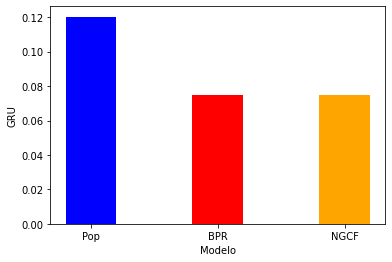

In [ ]:
plt.bar(["Pop", "BPR", "NGCF"], [ad_pop, ad_bpr, ad_ngcf], color =['blue', 'red', 'orange'],
        width = 0.4)

plt.xlabel("Modelo")
plt.ylabel("GRU")
plt.plot()